In [ ]:
import numpy as np

from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import losses

/home/ec2-user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ec2-user/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [33]:
import pprint
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
num_sv = 500
num_ssv = 10000
x_train_sv = x_train[0:num_sv]
y_train_sv = y_train[0:num_sv]

x_train_pssv = x_train[num_sv:num_ssv]
x_train_ssv = x_train[0:num_ssv]

In [4]:
x_train_sv = x_train_sv.reshape(x_train_sv.shape[0], 1, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)

x_train_pssv = x_train_pssv.reshape(x_train_pssv.shape[0],1,28,28)
x_train_ssv = x_train_ssv.reshape(x_train_ssv.shape[0], 1, 28, 28)

In [5]:
x_train_sv = x_train_sv.astype('float32')
x_test = x_test.astype('float32')

x_train_pssv = x_train_pssv.astype('float32')
x_train_ssv = x_train_ssv.astype('float32')

In [6]:
x_train_sv /= 255
x_test /= 255

x_train_pssv /= 255
x_train_ssv /= 255

In [7]:
y_train_sv = np_utils.to_categorical(y_train_sv, 10)
y_test = np_utils.to_categorical(y_test, 10)

y_train_add = np.zeros((x_train_ssv.shape[0] - x_train_sv.shape[0], 10))
print(y_train_add.shape)
print(y_train_sv.shape)
y_train_ssv = np.append(y_train_sv, y_train_add).reshape(num_ssv,10)
print(y_train_ssv.shape)

(9500, 10)
(500, 10)
(10000, 10)


In [8]:
print(y_train_add.shape)
print((x_train_sv.shape, y_train_sv.shape))
print((x_train_ssv.shape, y_train_ssv.shape))
print(x_train_pssv.shape)

(9500, 10)
((500, 1, 28, 28), (500, 10))
((10000, 1, 28, 28), (10000, 10))
(9500, 1, 28, 28)


In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(1, 28, 28), activation='relu', data_format='channels_first'))

print(model.output_shape)

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train_sv, y_train_sv,
          batch_size=32, epochs=2, verbose=1)

score = model.evaluate(x_test, y_test, verbose=0)
print(score)

(None, 32, 26, 26)
Epoch 1/2
500/500 [==============================] - 2s 5ms/step - loss: 2.0113 - acc: 0.3400
Epoch 2/2
500/500 [==============================] - 2s 4ms/step - loss: 1.1166 - acc: 0.6460
[0.8921383008003235, 0.7184]


Epoch 1/2
500/500 [==============================] - 18s 36ms/step - loss: 1.9495 - acc: 0.3260
Epoch 2/2
500/500 [==============================] - 17s 35ms/step - loss: 1.1030 - acc: 0.6540
[0.8234539795398712, 0.7564]


In [15]:
# Unlabel training

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(1, 28, 28), activation='relu', data_format='channels_first'))

print(model.output_shape)

model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss=losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model2.fit(x_train_ssv, y_train_ssv,
          batch_size=32, epochs=2, verbose=1)

score = model2.evaluate(x_test, y_test, verbose=0)
print(score)

(None, 10)
Epoch 1/2
10000/10000 [==============================] - 43s 4ms/step - loss: 0.0776 - acc: 0.1434
Epoch 2/2
10000/10000 [==============================] - 42s 4ms/step - loss: 0.0309 - acc: 0.1394
[0.5012403703212738, 0.8494]


array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])


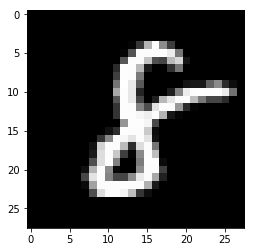

In [36]:
pp = pprint.PrettyPrinter()
pp.pprint(y_train_ssv[499])
plt.imshow(x_train_ssv[499].reshape(28, 28), cmap='gray')
plt.show()


In [73]:
score = model2.evaluate(x_test, y_test, verbose=0)
print(score)

[0.6822373986721039, 0.7788]


In [ ]:
# Psudo Label training

model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=(1, 28, 28), activation='relu', data_format='channels_first'))

print(model3.output_shape)

model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss=losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

(None, 32, 26, 26)


In [11]:
y_train_pssv = model.predict(x_train_pssv, batch_size=32)
print((x_train_pssv.shape, y_train_pssv.shape))

In [12]:
x_train_comb = np.append(x_train_sv, x_train_pssv).reshape(num_ssv, 1, 28, 28)
y_train_comb = np.append(y_train_sv, y_train_pssv).reshape(num_ssv, 10)


((9500, 1, 28, 28), (9500, 10))


In [13]:
print((x_train_comb.shape, y_train_comb.shape))

((10000, 1, 28, 28), (10000, 10))


In [14]:
model3.fit(x_train_comb, y_train_comb,
          batch_size=32, epochs=2, verbose=1)
score3 = model3.evaluate(x_test, y_test, verbose=0)
print(score3)

Epoch 1/2
10000/10000 [==============================] - 42s 4ms/step - loss: 1.2569 - acc: 0.8165
Epoch 2/2
10000/10000 [==============================] - 42s 4ms/step - loss: 1.1667 - acc: 0.8778
[0.8429812489509583, 0.7497]
